# Part 1

## Download data

In [1]:
import pandas as pd
import numpy as np
import urllib.request as ur

from IPython.display import display, HTML

In [2]:
# create a request
request = ur.Request('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/blended/ncdc-merged-sfc-mntp.dat.gz')
# download the data from the server
z_file = ur.urlopen(request)
# read data into a pandas DataFrame
df = pd.read_table(z_file, 
                   compression='gzip', 
                   names=['raw_data'], 
                   header=None)
df.head()

,raw_data
0,1 1880
1,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...
2,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...
3,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...
4,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...


## Clean/Manipulate data

In [3]:
df['raw_data_as_list'] = df['raw_data'].str.split()
df['value_entries'] = df['raw_data_as_list'].str.len()

df['is_date'] = (df['value_entries'] == 2)
df_temperature_anomalies = df[~df['is_date']]
df_dates = df[df['is_date']][['raw_data_as_list']]

display(df_temperature_anomalies.head())
display(df_dates.head())

,raw_data,raw_data_as_list,value_entries,is_date
1,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...,"[-9999, -9999, -9999, -9999, -9999, -9999, -99...",72,False
2,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...,"[-9999, -9999, -9999, -9999, -9999, -9999, -99...",72,False
3,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...,"[-9999, -9999, -9999, -9999, -9999, -9999, -99...",72,False
4,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...,"[-9999, -9999, -9999, -9999, -9999, -9999, -99...",72,False
5,-9999 -9999 -9999 -9999 -9999 -9999 -9999 -99...,"[-9999, -9999, -9999, -9999, -9999, -9999, -99...",72,False


,raw_data_as_list
0,"[1, 1880]"
37,"[2, 1880]"
74,"[3, 1880]"
111,"[4, 1880]"
148,"[5, 1880]"


In [4]:
df_temperature_anomalies = df_temperature_anomalies['raw_data_as_list'].apply(pd.Series)

# rename columns
lon_W = [('lon_' + str(i-5) + '_' + str(i) + 'W') for i in range(180, 0, -5)]
lon_E = [('lon_' + str(i-5) + '_' + str(i) + 'E') for i in range(5, 185, 5)]
column_name_lon = lon_W + lon_E
df_temperature_anomalies.columns = column_name_lon 

df_temperature_anomalies.head()

,lon_175_180W,lon_170_175W,lon_165_170W,lon_160_165W,lon_155_160W,lon_150_155W,lon_145_150W,lon_140_145W,lon_135_140W,lon_130_135W,...,lon_130_135E,lon_135_140E,lon_140_145E,lon_145_150E,lon_150_155E,lon_155_160E,lon_160_165E,lon_165_170E,lon_170_175E,lon_175_180E
1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
5,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [5]:
df_dates = df_dates['raw_data_as_list'].apply(pd.Series)
df_dates.columns = ['month', 'year']

new_index = df_dates.index + 1
df_dates.index = new_index

df = pd.concat([df_dates, df_temperature_anomalies], axis=1)
df[['month', 'year']] = df[['month', 'year']].fillna(method='ffill')

lat_N = [(str(i-5) + '_' + str(i) + 'N') for i in range(90, 0, -5)]
lat_S = [(str(i-5) + '_' + str(i) + 'S') for i in range(5, 95, 5)]
lat = lat_N + lat_S
number_of_month_year_combination = len(df_dates)
lat_column = lat * 1668
lat_column = np.array(lat_column)

df.insert(2, 'lat', lat_column)

In [6]:
display(df.head())
display(df.tail())

,month,year,lat,lon_175_180W,lon_170_175W,lon_165_170W,lon_160_165W,lon_155_160W,lon_150_155W,lon_145_150W,...,lon_130_135E,lon_135_140E,lon_140_145E,lon_145_150E,lon_150_155E,lon_155_160E,lon_160_165E,lon_165_170E,lon_170_175E,lon_175_180E
1,1,1880,85_90N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,1,1880,80_85N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,1,1880,75_80N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,1,1880,70_75N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
5,1,1880,65_70N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


,month,year,lat,lon_175_180W,lon_170_175W,lon_165_170W,lon_160_165W,lon_155_160W,lon_150_155W,lon_145_150W,...,lon_130_135E,lon_135_140E,lon_140_145E,lon_145_150E,lon_150_155E,lon_155_160E,lon_160_165E,lon_165_170E,lon_170_175E,lon_175_180E
61711,12,2018,65_70S,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
61712,12,2018,70_75S,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
61713,12,2018,75_80S,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
61714,12,2018,80_85S,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
61715,12,2018,85_90S,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [7]:
df.to_csv('temp_anomalies.csv', index=None)

## Exploratory Data Analysis (EDA)

In [8]:
from math import pi
import pandas as pd

# basic plotting
from bokeh.plotting import figure, show
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.io import output_notebook
from bokeh.colors import RGB

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

%config InlineBackend.figure_format = 'retina'
output_notebook()

Loading BokehJS ...

In [9]:
df = pd.read_csv('temp_anomalies.csv')
df.head()

,month,year,lat,lon_175_180W,lon_170_175W,lon_165_170W,lon_160_165W,lon_155_160W,lon_150_155W,lon_145_150W,...,lon_130_135E,lon_135_140E,lon_140_145E,lon_145_150E,lon_150_155E,lon_155_160E,lon_160_165E,lon_165_170E,lon_170_175E,lon_175_180E
0,1,1880,85_90N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,1,1880,80_85N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,1,1880,75_80N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,1,1880,70_75N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,1,1880,65_70N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


Text(0.5, 1.0, 'Temperature anomalies value counts')

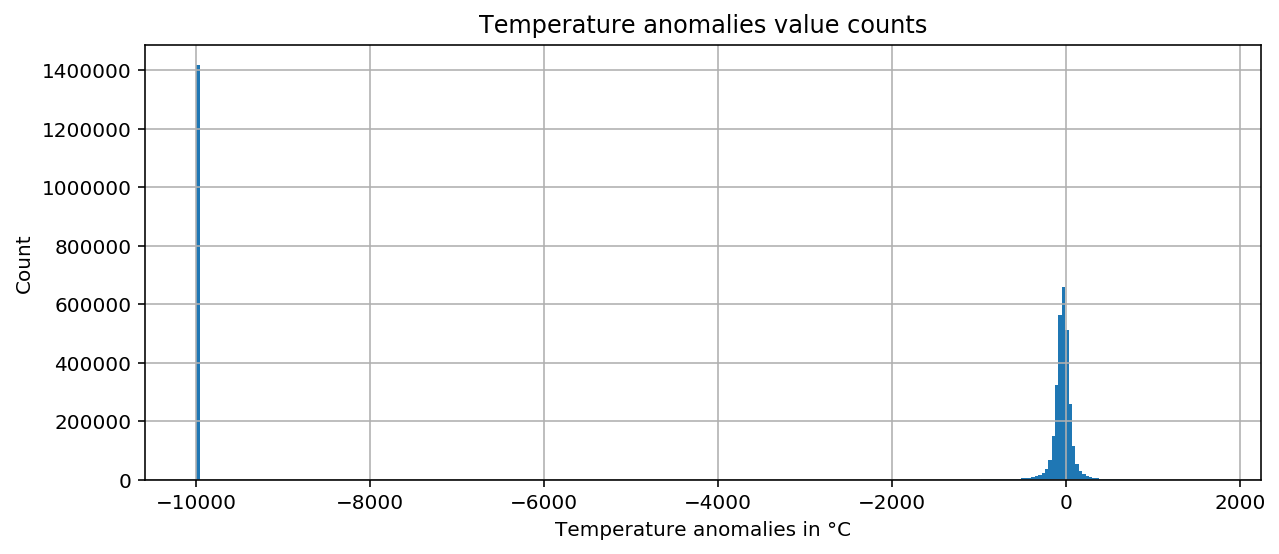

In [10]:
plot = df.iloc[:,3:].stack().hist(figsize=(10,4), bins=300)
plot.set_xlabel("Temperature anomalies in °C")
plot.set_ylabel("Count")
plot.set_title("Temperature anomalies value counts")

In [11]:
heatmap_data = df.iloc[:,2:]
heatmap_data.iloc[:,1:] = heatmap_data.iloc[:,1:] == -9999
grouped_by_lat = heatmap_data.groupby('lat', sort=False)
heatmap_data = grouped_by_lat.sum()

# reshape to 1D array or rates with a month and year for each row.
heatmap_data_stack = pd.DataFrame(heatmap_data.stack(), columns=['number_of_NaN']).reset_index()
heatmap_data_stack = heatmap_data_stack.rename(columns={"lat": "latitude", "level_1": "longitude"})

# this is the colormap from the original NYTimes plot
m_coolwarm_rgb = (255 * cm.coolwarm(range(256))).astype('int')
coolwarm_palette = [RGB(*tuple(rgb)).to_hex() for rgb in m_coolwarm_rgb]
mapper = LinearColorMapper(palette=coolwarm_palette, low=heatmap_data_stack.number_of_NaN.min(),
                           high=heatmap_data_stack.number_of_NaN.max())

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

latitude = list(reversed(heatmap_data.index.tolist()))
longitude = heatmap_data.columns.tolist()

p = figure(title="Counts",
           x_range=longitude, y_range=latitude,
           x_axis_location="above", plot_width=900, plot_height=400,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('Longitude:', '@longitude'), ('Latitude: ', '@latitude'), ('Number of NaN', '@number_of_NaN')])

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="longitude", y="latitude", width=1, height=1,
       source=heatmap_data_stack,
       fill_color={'field': 'number_of_NaN', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=15),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

show(p)      # show the plot

In [12]:
df = df.replace(-9999, np.nan)
display(df.head())
df.to_csv('temp_anomalies_clean.csv')

,month,year,lat,lon_175_180W,lon_170_175W,lon_165_170W,lon_160_165W,lon_155_160W,lon_150_155W,lon_145_150W,...,lon_130_135E,lon_135_140E,lon_140_145E,lon_145_150E,lon_150_155E,lon_155_160E,lon_160_165E,lon_165_170E,lon_170_175E,lon_175_180E
0,1,1880,85_90N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1880,80_85N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1880,75_80N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1880,70_75N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1880,65_70N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
